# Classification plant phenotype

This is an example of a non-geospatial use of the MapReader pipeline

# Load

https://mapreader.readthedocs.io/en/latest/User-guide/Load.html

## Load images

In [5]:
from mapreader import loader

path2images = "./dataset/open_access_plant/*.png"
my_files = loader(path2images)

  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(my_files)}")

Number of images: 2


In [7]:
print(my_files)

#images: 2

#parents: 2
2014-06-06_plant001_rgb.png
2014-07-17_plant047_rgb.png

#patches: 0



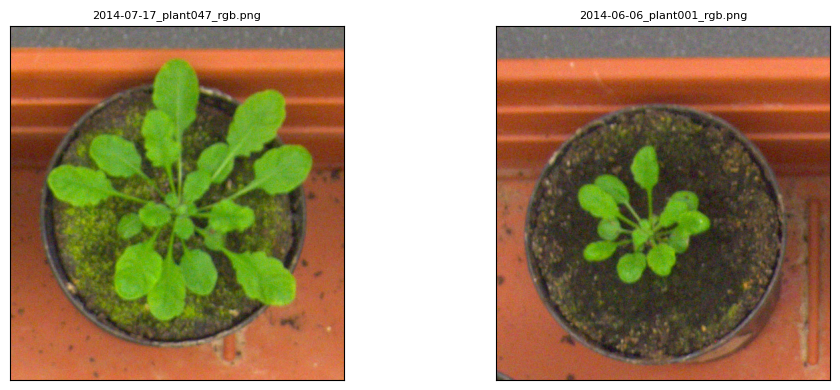

In [8]:
my_files.show_sample(num_samples=2, tree_level="parent")

## Patchify images

In [9]:
my_files.patchify_all(patch_size=50)  # in pixels

[INFO] Saving patches in directory named "patches_50_pixel".


  0%|          | 0/2 [00:00<?, ?it/s]

dataset/open_access_plant/2014-06-06_plant001_rgb.png
dataset/open_access_plant/2014-07-17_plant047_rgb.png


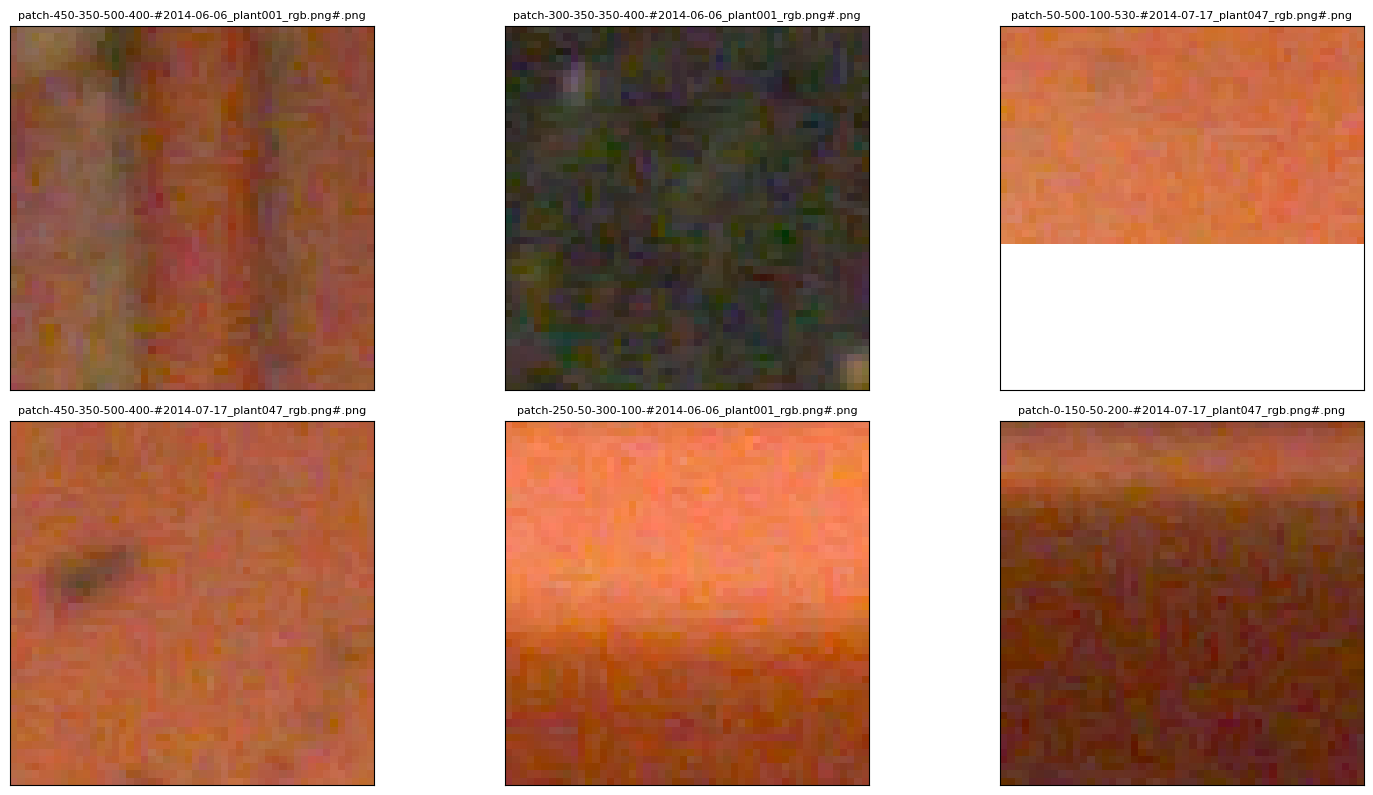

In [6]:
my_files.show_sample(num_samples=6, tree_level="patch")

In [7]:
parent_list = my_files.list_parents()
patch_list = my_files.list_patches()

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 1 Axes>]

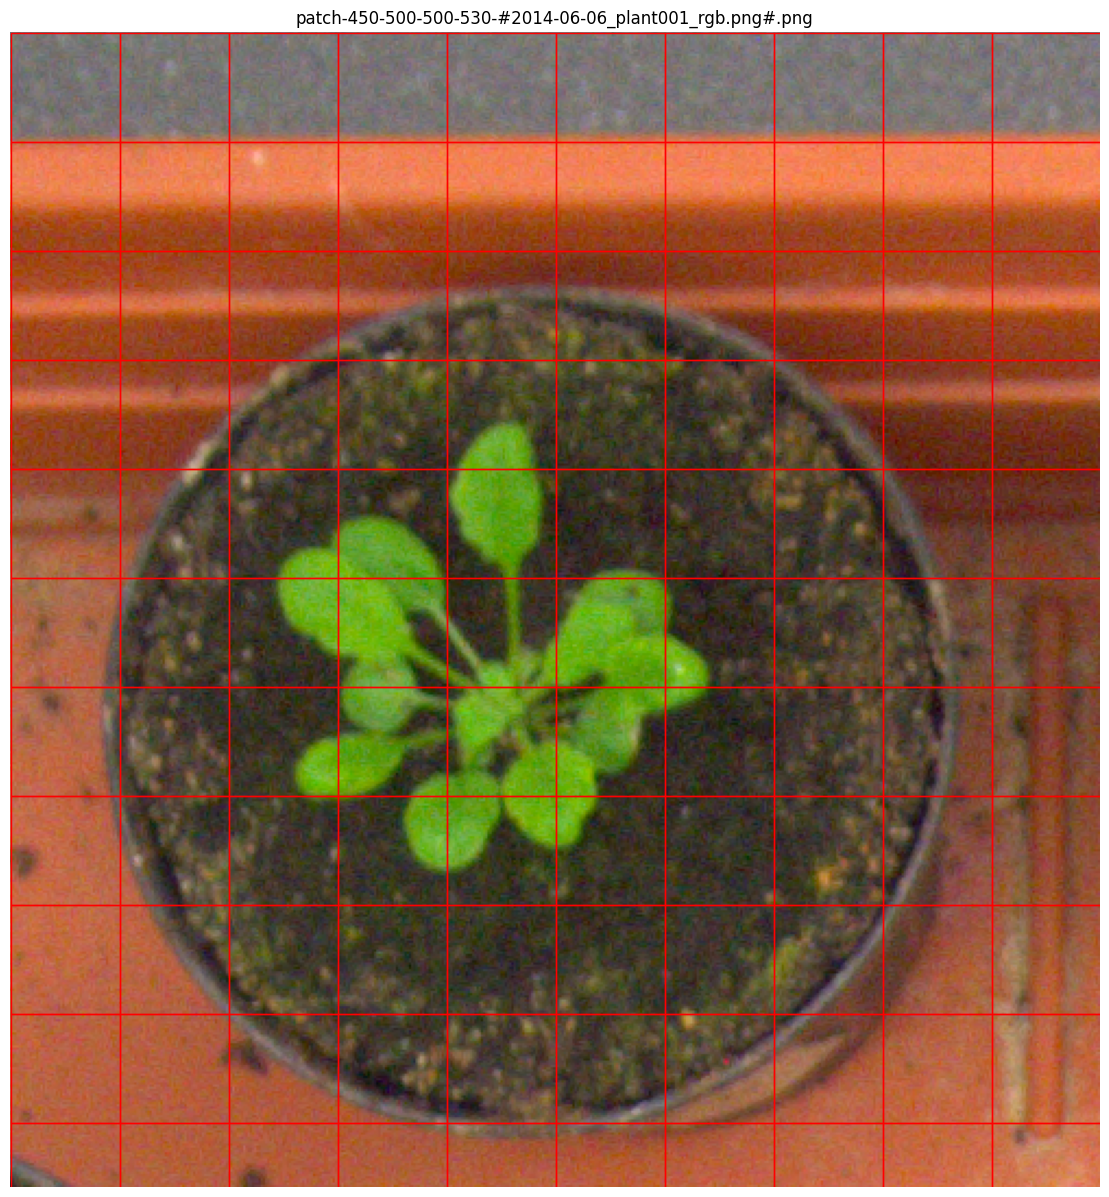

In [8]:
my_files.show_parent(
    parent_list[0], patch_border=True, plot_parent=True, figsize=(15, 15)
)

## Calculate pixel intensities

In [9]:
my_files.calc_pixel_stats()

  0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
parent_df, patch_df = my_files.convert_images(save=True)

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


In [11]:
parent_df.head()

parent_id  \
image_id                                
2014-06-06_plant001_rgb.png      None   
2014-07-17_plant047_rgb.png      None   

                                                                    image_path  \
image_id                                                                         
2014-06-06_plant001_rgb.png  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
2014-07-17_plant047_rgb.png  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   

                                     shape  \
image_id                                     
2014-06-06_plant001_rgb.png  (530, 500, 4)   
2014-07-17_plant047_rgb.png  (530, 500, 4)   

                                                                       patches  
image_id                                                                        
2014-06-06_plant001_rgb.png  [patch-0-0-50-50-#2014-06-06_plant001_rgb.png#...  
2014-07-17_plant047_rgb.png  [patch-0-0-50-50-#2014-07-17_plant047_rgb.png#...

In [12]:
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   2014-06-06_plant001_rgb.png   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   

                                                          shape  \
image_id                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   (50, 50, 4)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  (50, 50, 4)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png      (0, 0, 50, 50)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...   (0, 50, 50, 100)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (0, 100, 50, 150)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (0, 150, 50, 200)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (0, 200, 50, 250)   

                                                    mean_pixel_R  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.478751   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.811368   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.682626   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.630331   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.453997   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.413255   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.314795   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.300660   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.447296   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.238436   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.156773   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.159903   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png            1.0     0.046421   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...           1.0     0.131187   
patch-0-100-50-

In [13]:
patch_df.mean()

mean_pixel_R    0.512725
mean_pixel_G    0.388799
mean_pixel_B    0.208943
mean_pixel_A    1.000000
std_pixel_R     0.093617
std_pixel_G     0.084910
std_pixel_B     0.070554
std_pixel_A     0.000000
dtype: float64

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 2000x2000 with 2 Axes>]

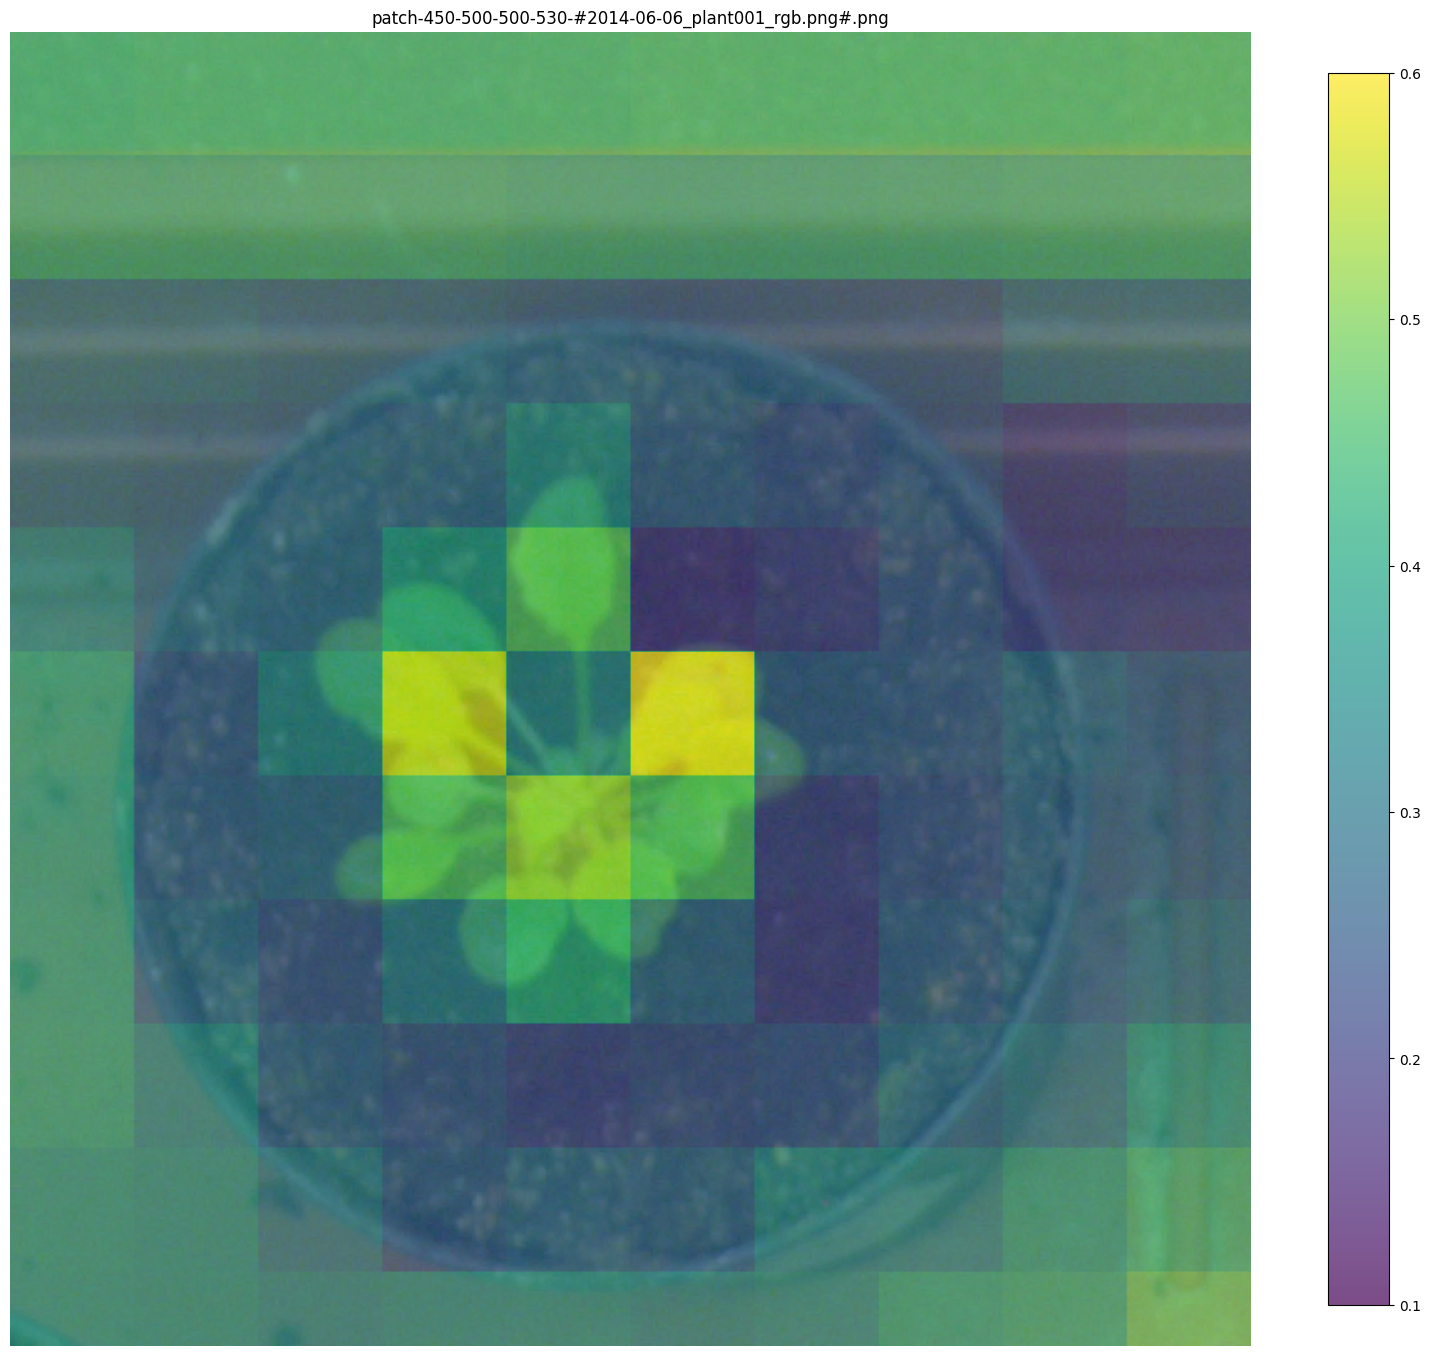

In [14]:
my_files.show_parent(
    parent_list[0],
    column_to_plot="mean_pixel_G",
    patch_border=False,
    plot_parent=True,
    vmin=0.1,
    vmax=0.6,
    figsize=(20, 20),
    alpha=0.7,
)

# Annotate
https://mapreader.readthedocs.io/en/latest/User-guide/Annotate.html

## Set up inputs

In [1]:
from mapreader import Annotator

In [16]:
annotator = Annotator(
    patch_paths="./patches_50_pixel/*png", 
    parent_paths="./dataset/open_access_plant/*png",
    metadata_path="./parent_df.csv",
    annotations_dir= "./annotations_phenotype_open_access",
    username = "kasra",
    task_name = "phenotype",
    labels =["No", "Plant"],
    sortby="mean_pixel_G",
    show_context=True,
)

[INFO] Loading patches from ./patches_50_pixel/*png.
[INFO] Loading parents from ./dataset/open_access_plant/*png.


0it [00:00, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/220 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

[INFO] Adding metadata from ./parent_df.csv.
[INFO] Loading existing patch annotations.


In [19]:
annotator.annotate(resize_to=500, sortby="mean_pixel_G", ascending=False)

Output(layout=Layout(align_items='center', display='flex', flex_flow='column'))

# Classify - Train
https://mapreader.readthedocs.io/en/latest/User-guide/Classify.html

## Read in annotations

In [1]:
from mapreader import AnnotationsLoader

In [2]:
annotated_images = AnnotationsLoader()

annotated_images.load("./annotations_phenotype_open_access/phenotype_test_#kasra#.csv", images_dir="./patches_50_pixel/")

[INFO] Reading "./annotations_phenotype_open_access/phenotype_test_#kasra#.csv"
[INFO] Number of annotations:   139

[INFO] Number of instances of each label (from column "label"):
    - 1:  92
    - 2:  47



In [3]:
annotated_images.annotations

label  \
image_id                                                   
patch-300-350-350-400-#2014-06-06_plant001_rgb....     1   
patch-250-400-300-450-#2014-06-06_plant001_rgb....     1   
patch-300-250-350-300-#2014-06-06_plant001_rgb....     2   
patch-200-400-250-450-#2014-06-06_plant001_rgb....     1   
patch-300-150-350-200-#2014-06-06_plant001_rgb....     1   
...                                                  ...   
patch-150-300-200-350-#2014-07-17_plant047_rgb....     2   
patch-350-300-400-350-#2014-07-17_plant047_rgb....     2   
patch-200-300-250-350-#2014-06-06_plant001_rgb....     2   
patch-200-250-250-300-#2014-07-17_plant047_rgb....     2   
patch-400-250-450-300-#2014-06-06_plant001_rgb....     1   

                                                                                           image_path  \
image_id                                                                                                
patch-300-350-350-400-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-250-400-300-450-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-300-250-350-300-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-200-400-250-450-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-300-150-350-200-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
...                                                                                               ...   
patch-150-300-200-350-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-350-300-400-350-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-200-300-250-350-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-200-250-250-300-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-400-250-450-300-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   

                                                    label_index  
image_id                                                         
patch-300-350-350-400-#2014-06-06_plant001_rgb....            0  
patch-250-400-300-450-#2014-06-06_plant001_rgb....            0  
patch-300-250-350-300-#2014-06-06_plant001_rgb....            1  
patch-200-400-250-450-#2014-06-06_plant001_rgb....            0  
patch-300-150-350-200-#2014-06-06_plant001_rgb....            0  
...                                                         ...  
patch-150-300-200-350-#2014-07-17_plant047_rgb....            1  
patch-350-300-400-350-#2014-07-17_plant047_rgb....            1  
patch-200-300-250-350-#2014-06-06_plant001_rgb....            1  
patch-200-250-250-300-#2014-07-17_plant047_rgb....            1  
patch-400-250-450-300-#2014-06-06_plant001_rgb....            0  

[139 rows x 3 columns]

In [4]:
print(annotated_images)

[INFO] Number of annotations:   139

[INFO] Number of instances of each label (from column "label"):
    - 1:  92
    - 2:  47



In [5]:
annotated_images.annotations.index[5]

'patch-300-300-350-350-#2014-06-06_plant001_rgb.png#.png'

In [6]:
# show sample images for one labe (label_to_show)
annotated_images.show_sample(label_to_show="Plant")

<Figure size 800x0 with 0 Axes>

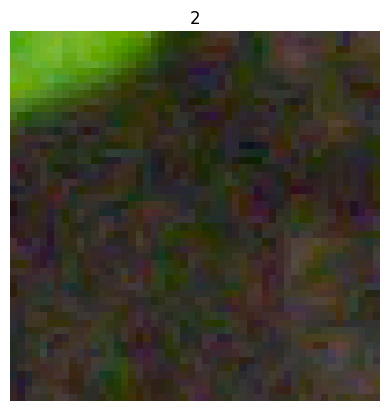

In [7]:
# show an image based on its index
annotated_images.show_patch("patch-300-300-350-350-#2014-06-06_plant001_rgb.png#.png")

## Prepare datasets and dataloaders

In [8]:
annotated_images.create_datasets(frac_train=0.7, frac_val=0.2, frac_test=0.1)

[INFO] Number of annotations in each set:
    - train:   97
    - val:   28
    - test:   14


In [9]:
annotated_images.labels_map

{0: '1', 1: '2'}

In [10]:
dataloaders = annotated_images.create_dataloaders(batch_size=16)

[INFO] Using default sampler.


## Set up `ClassifierContainer`

### Load a pretrained PyTorch model, dataloaders and labels map

In [11]:
from mapreader import ClassifierContainer

In [12]:
my_classifier = ClassifierContainer(model ="resnet18",
                                    labels_map={0: 'No', 1: 'plant'},
                                    dataloaders=dataloaders
                                    )

[INFO] Device is set to cpu
[INFO] Initializing model.
[INFO] Loaded "train" with 97 items.
[INFO] Loaded "val" with 28 items.
[INFO] Loaded "test" with 14 items.


In [13]:
my_classifier.labels_map

{0: 'No', 1: 'plant'}

[INFO] dataset: train
        - items:        97
        - batch size:   16
        - batches:      7


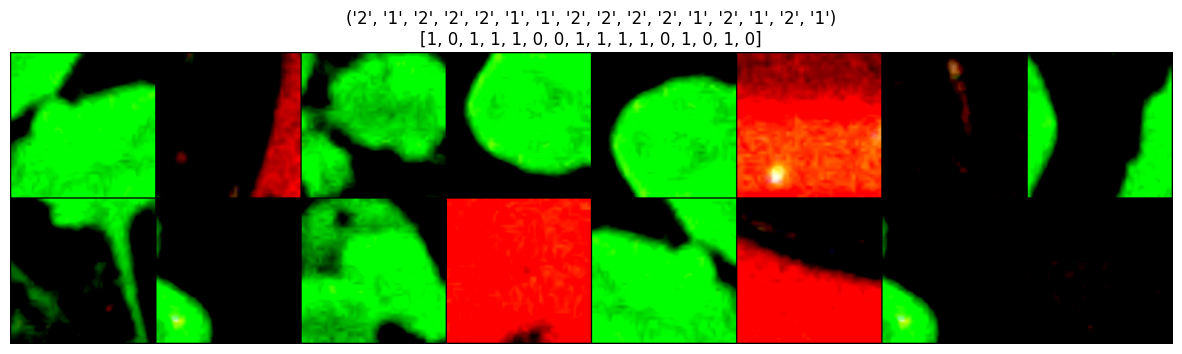

In [14]:
# show sample of transformed images
my_classifier.show_sample(set_name="train", batch_number=1)

In [15]:
my_classifier.model_summary()

Layer (type:depth-idx)                   Output Shape              Output Shape              Param #
ResNet                                   [16, 2]                   [16, 2]                   --
├─Conv2d: 1-1                            [16, 64, 112, 112]        [16, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [16, 64, 112, 112]        [16, 64, 112, 112]        128
├─ReLU: 1-3                              [16, 64, 112, 112]        [16, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [16, 64, 56, 56]          [16, 64, 56, 56]          --
├─Sequential: 1-5                        [16, 64, 56, 56]          [16, 64, 56, 56]          --
│    └─BasicBlock: 2-1                   [16, 64, 56, 56]          [16, 64, 56, 56]          --
│    │    └─Conv2d: 3-1                  [16, 64, 56, 56]          [16, 64, 56, 56]          36,864
│    │    └─BatchNorm2d: 3-2             [16, 64, 56, 56]          [16, 64, 56, 56]          128
│    │    └─ReLU: 3-3     

### Set up criterion, optimizer and scheduler

In [16]:
my_classifier.add_criterion()

[INFO] Using "CrossEntropyLoss()" as criterion.


In [17]:
my_classifier.initialize_optimizer()

In [18]:
my_classifier.initialize_scheduler()

## Train/fine-tune a model

In [19]:
my_classifier.train(
    num_epochs=10,
    tmp_file_save_freq=2,
    remove_after_load=False,
    print_info_batch_freq=5,
)

[INFO] Each step will pass: ['train', 'val'].
2024-05-13 09:16:39 599-JY5FK6 [INFO] train    -- 1/10 --      16/97 ( 16.5% ) -- Loss: 1.200
2024-05-13 09:16:47 599-JY5FK6 [INFO] train    -- 1/10 --      96/97 ( 99.0% ) -- Loss: 0.062
2024-05-13 09:16:47 599-JY5FK6 [INFO] train    -- 1/10 -- Loss: 0.426; F_macro: 78.88; R_macro: 78.79
2024-05-13 09:16:48 599-JY5FK6 [INFO] val      -- 1/10 --      16/28 ( 57.1% ) -- Loss: 2.239
2024-05-13 09:16:48 599-JY5FK6 [INFO] val      -- 1/10 -- Loss: 1.321; F_macro: 91.81; R_macro: 91.81

2024-05-13 09:16:49 599-JY5FK6 [INFO] train    -- 2/10 --      16/97 ( 16.5% ) -- Loss: 0.219
2024-05-13 09:16:57 599-JY5FK6 [INFO] train    -- 2/10 --      96/97 ( 99.0% ) -- Loss: 0.737
2024-05-13 09:16:57 599-JY5FK6 [INFO] train    -- 2/10 -- Loss: 0.308; F_macro: 91.73; R_macro: 91.86
2024-05-13 09:16:58 599-JY5FK6 [INFO] val      -- 2/10 --      16/28 ( 57.1% ) -- Loss: 6.919
2024-05-13 09:16:58 599-JY5FK6 [INFO] val      -- 2/10 -- Loss: 4.002; F_macro: 96.

In [20]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

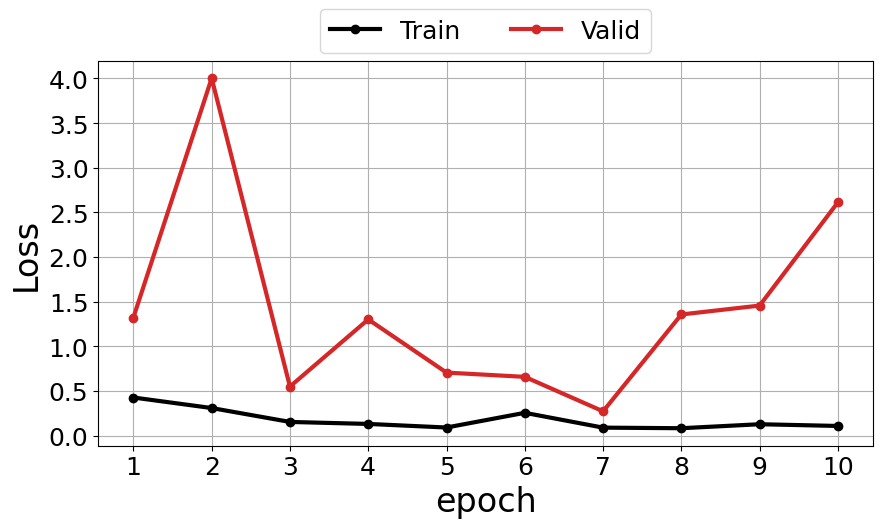

In [21]:
my_classifier.plot_metric(
    y_axis=["epoch_loss_train", "epoch_loss_val"],
    y_label="Loss",
    legends=["Train", "Valid"],
    colors=["k", "tab:red"],
)

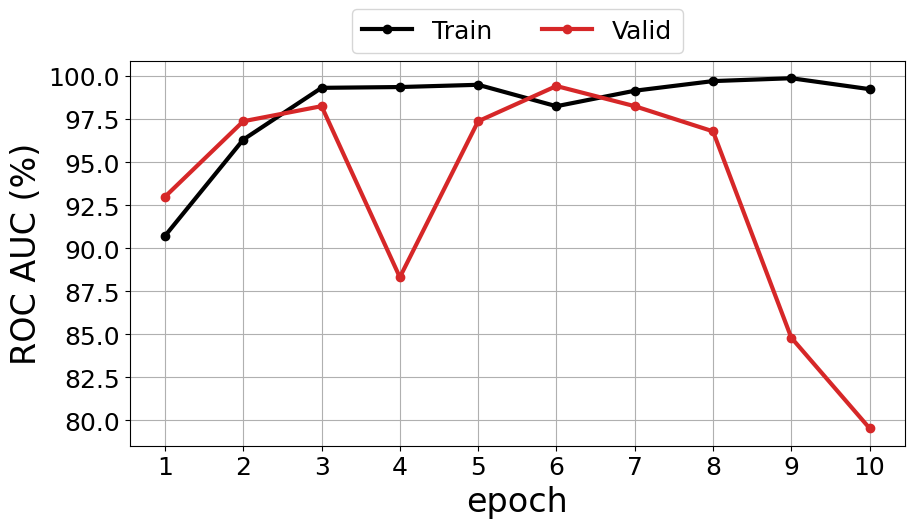

In [23]:
my_classifier.plot_metric(
    y_axis=["epoch_rocauc_macro_train", "epoch_rocauc_macro_val"],
    y_label="ROC AUC (%)",
    legends=["Train", "Valid"],
    colors=["k", "tab:red"],
)

# Classify - Infer

https://mapreader.readthedocs.io/en/latest/User-guide/Classify.html

## Create dataset with all patches and add to ``ClassifierContainer``

In [46]:
from mapreader import PatchDataset

In [47]:
data = PatchDataset("./patch_df.csv", transform="val")

[INFO] Reading "./patch_df.csv".


In [48]:
my_classifier.load_dataset(data, set_name="all_plants")

## Infer labels

In [49]:
my_classifier.inference("all_plants")

[INFO] Each step will pass: ['all_plants'].
2024-02-21 17:08:29 599-JY5FK6 [INFO] all_plants -- 11/11 --     16/220 (  7.3% ) -- 
2024-02-21 17:08:32 599-JY5FK6 [INFO] all_plants -- 11/11 --     96/220 ( 43.6% ) -- 
2024-02-21 17:08:35 599-JY5FK6 [INFO] all_plants -- 11/11 --    176/220 ( 80.0% ) -- 
[INFO] Total time: 0m 8s


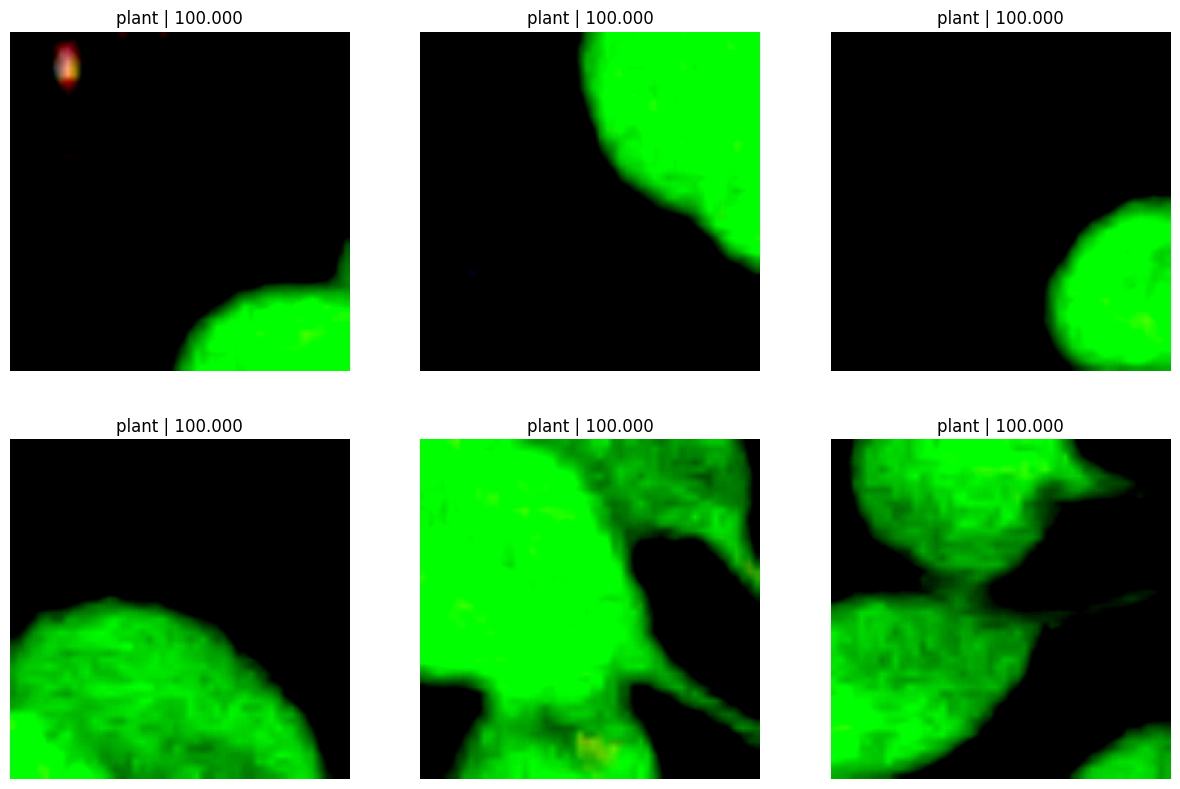

In [50]:
my_classifier.show_inference_sample_results(
    label="plant", set_name="all_plants", min_conf=99
)

## Add predictions to dataframe

In [51]:
predictions_df = data.patch_df

In [52]:
import numpy as np
import pandas as pd

predictions_df["predicted_label"] = my_classifier.pred_label
predictions_df["pred"] = my_classifier.pred_label_indices
predictions_df["conf"] = np.array(my_classifier.pred_conf).max(axis=1)

predictions_df.head()

parent_id  \
image_id                                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   2014-06-06_plant001_rgb.png   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   

                                                          shape  \
image_id                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   (50, 50, 4)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  (50, 50, 4)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png      (0, 0, 50, 50)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...   (0, 50, 50, 100)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (0, 100, 50, 150)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (0, 150, 50, 200)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (0, 200, 50, 250)   

                                                    mean_pixel_R  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.478751   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.811368   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.682626   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.630331   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.453997   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.413255   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.314795   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.300660   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.447296   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.238436   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.156773   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.159903   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png            1.0     0.046421   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...           1.0     0.131187   
patch-0-100-50-

In [53]:
predictions_df.to_csv("./predictions_df.csv", sep=",", index_label="image_id")

## Add outputs to `MapImages` as metadata

In [57]:
my_files = loader("./dataset/open_access_plant/*.png")
my_files.load_patches("./patches_50_pixel/*png")
my_files.add_metadata(predictions_df, tree_level="patch")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/220 [00:00<?, ?it/s]

In [59]:
parent_df, patch_df = my_files.convert_images()
patch_df.head()

parent_id  \
image_id                                                                          
patch-100-400-150-450-#2014-06-06_plant001_rgb....  2014-06-06_plant001_rgb.png   
patch-100-500-150-530-#2014-06-06_plant001_rgb....  2014-06-06_plant001_rgb.png   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...  2014-07-17_plant047_rgb.png   
patch-100-300-150-350-#2014-06-06_plant001_rgb....  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-100-400-150-450-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-100-500-150-530-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-100-300-150-350-#2014-06-06_plant001_rgb....  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/mapreader/MapReader/worked_ex...   

                                                            pixel_bounds  \
image_id                                                                   
patch-100-400-150-450-#2014-06-06_plant001_rgb....  (100, 400, 150, 450)   
patch-100-500-150-530-#2014-06-06_plant001_rgb....  (100, 500, 150, 530)   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...   (50, 100, 100, 150)   
patch-100-300-150-350-#2014-06-06_plant001_rgb....  (100, 300, 150, 350)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...     (0, 200, 50, 250)   

                                                          shape  mean_pixel_R  \
image_id                                                                        
patch-100-400-150-450-#2014-06-06_plant001_rgb....  (50, 50, 4)      0.295043   
patch-100-500-150-530-#2014-06-06_plant001_rgb....  (50, 50, 4)      0.682933   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...  (50, 50, 4)      0.575020   
patch-100-300-150-350-#2014-06-06_plant001_rgb....  (50, 50, 4)      0.257760   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-100-400-150-450-#2014-06-06_plant001_rgb....      0.269277   
patch-100-500-150-530-#2014-06-06_plant001_rgb....      0.351475   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...      0.270891   
patch-100-300-150-350-#2014-06-06_plant001_rgb....      0.283120   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-100-400-150-450-#2014-06-06_plant001_rgb....      0.184367   
patch-100-500-150-530-#2014-06-06_plant001_rgb....      0.235226   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...      0.129955   
patch-100-300-150-350-#2014-06-06_plant001_rgb....      0.134273   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-100-400-150-450-#2014-06-06_plant001_rgb....           1.0     0.075603   
patch-100-500-150-530-#2014-06-06_plant001_rgb....           1.0     0.065942   
patch-50-100-100-150-#2014-07-17_plant047_rgb.p...           1.0     0.117644   
patch-100-300-150-350-#2014-06-06_plant001_rgb....           1.0     0.083650   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...           1.0     0.056804   

                                                    std_pixel_G  std_pixel_B  \
image_id                                         

In [60]:
parent_list = my_files.list_parents()

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 2 Axes>]

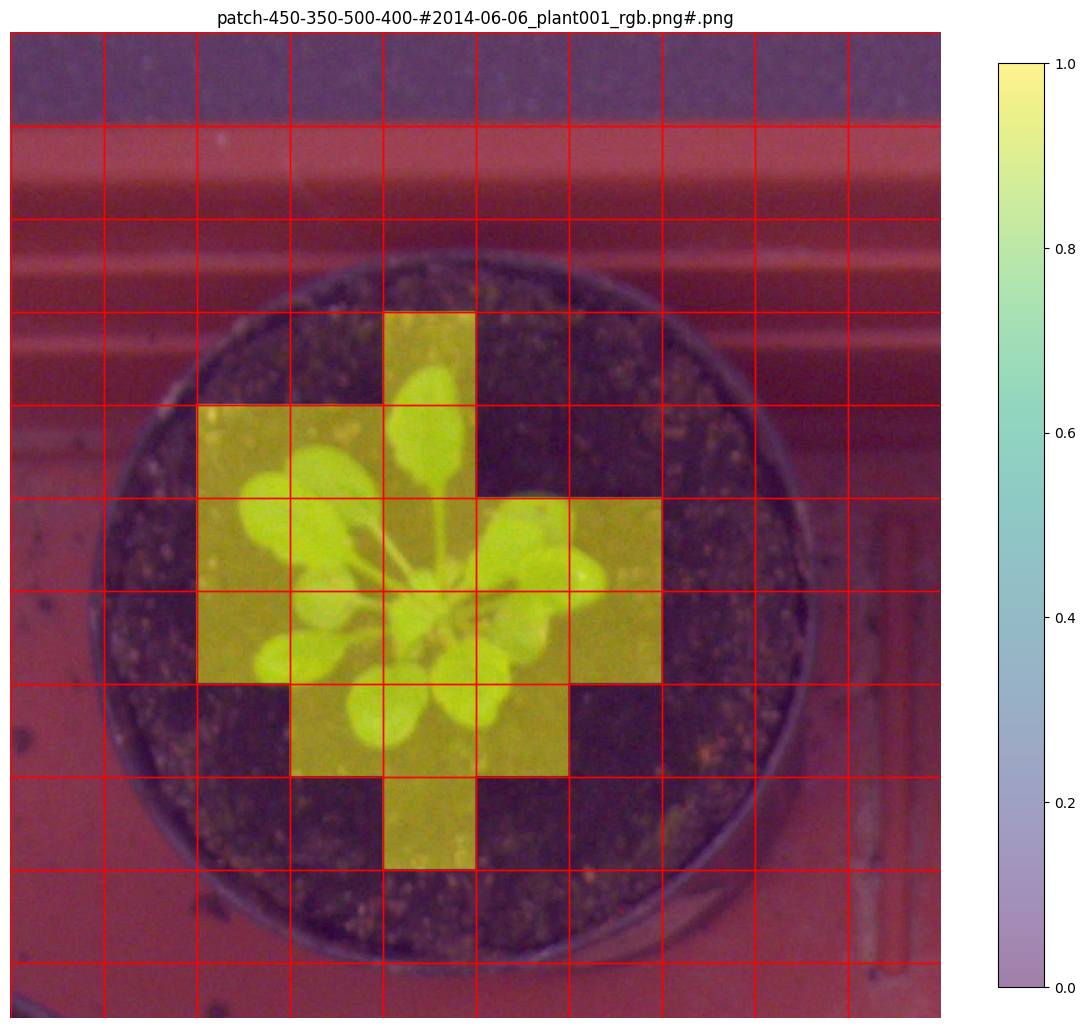

In [61]:
my_files.show_parent(
    parent_list[0],
    column_to_plot="pred",
    patch_border=True,
    plot_parent=True,
    figsize=(15, 15),
    alpha=0.5,
)

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 2 Axes>]

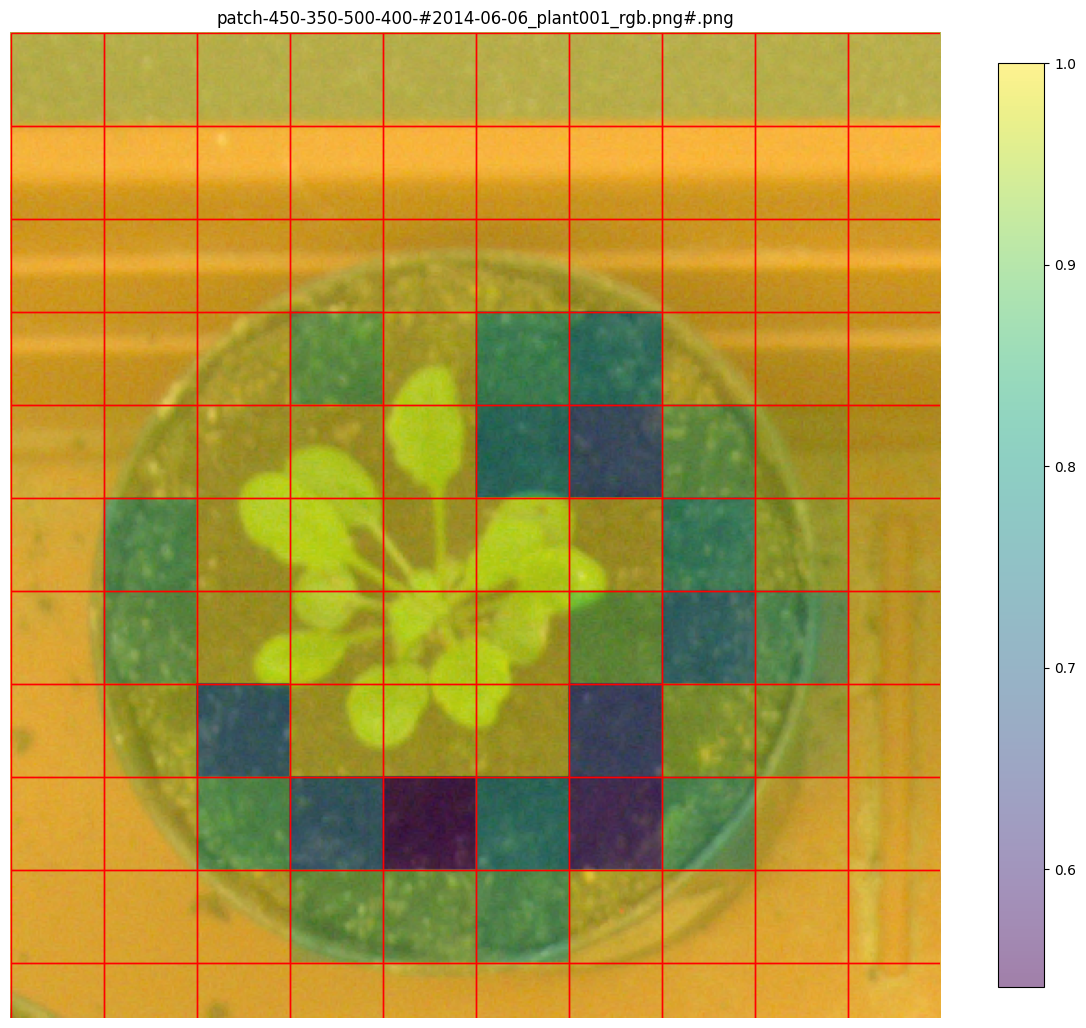

In [62]:
my_files.show_parent(
    parent_list[0],
    column_to_plot="conf",
    patch_border=True,
    plot_parent=True,
    figsize=(15, 15),
    alpha=0.5,
)